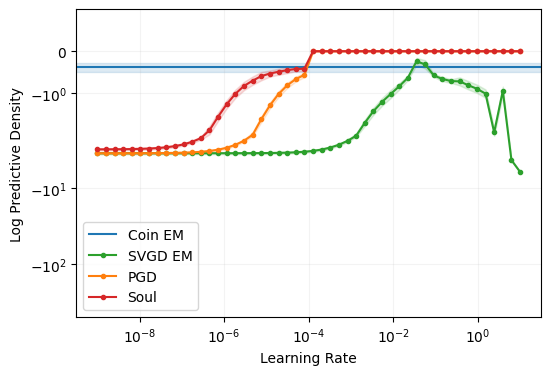

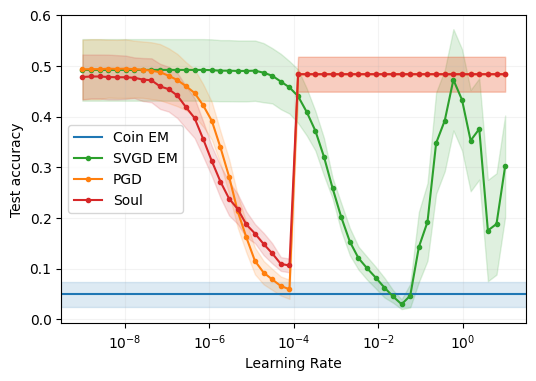

In [10]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

with open(f"results/mnist.pkl","rb") as f:
            data = pickle.load(f)

with open(f"results/coin_mnist.pkl","rb") as f:
      cdata = pickle.load(f)

with open(f"results/heuristics.pkl","rb") as f:
    hdata = pickle.load(f)

with open(f"results/coin_mnist_big_theta_alpha.pkl","rb") as f:
    chdata = pickle.load(f)

index = -1

for metric in ["lppd", "error"]:

        if metric == "lppd":
              num = -1e-1
        
        if metric == "error":
            num = 1e10

        coin = jnp.nan_to_num(jnp.array(cdata[metric]["coin_svgd"]))[:, index] # Repetitions, by iterations


        marginal_coin = jnp.nan_to_num(jnp.array(cdata[metric]["marginal_coin_svgd"]))[:, index] # Repetitions, by iterations
        ada = jnp.nan_to_num(jnp.array(data[metric]["ada_svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        pgd = jnp.nan_to_num(jnp.array(data[metric]["pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        soul = jnp.nan_to_num(jnp.array(data[metric]["soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        marginal_pgd = jnp.nan_to_num(jnp.array(data[metric]["marginal_pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions

        h_pgd = jnp.nan_to_num(jnp.array(hdata[metric]["pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        h_soul = jnp.nan_to_num(jnp.array(hdata[metric]["soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        h_svgd = jnp.nan_to_num(jnp.array(hdata[metric]["svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions


        step_sizes = data["step_sizes"]

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # # Plot coin
        # ax.axhline(marginal_coin.mean(axis=0), label="Coin MEM", color ="C6")
        # ax.axhspan(marginal_coin.mean(axis=0) - marginal_coin.std(axis=0), marginal_coin.mean(axis=0) + marginal_coin.std(axis=0), alpha=0.15, color = "C6")

        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.15, color = "C0")

        # Plot ada
        ax.plot(step_sizes, ada.mean(axis=0), ".-", label='SVGD EM', color="C2")
        ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.15 , color="C2")

        # Plot pgd
        ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # Plot soul
        ax.plot(step_sizes, soul.mean(axis=0), ".-", label='Soul', color="C3")
        ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot marginal_pgd
        # ax.plot(step_sizes, marginal_pgd.mean(axis=0), ".-", label='PMGD', color="C4")
        # ax.fill_between(step_sizes, marginal_pgd.mean(axis=0) - jnp.minimum(marginal_pgd.std(axis=0), thresh), marginal_pgd.mean(axis=0) + jnp.minimum(marginal_pgd.std(axis=0), thresh), alpha=0.15, color="C4")

        # # Plot h_pgd
        # ax.plot(hdata["step_sizes"], h_pgd.mean(axis=0), ".-", label='Heuristic PGD', color="C5")
        # ax.fill_between(hdata["step_sizes"], h_pgd.mean(axis=0) - jnp.minimum(h_pgd.std(axis=0), thresh), h_pgd.mean(axis=0) + jnp.minimum(h_pgd.std(axis=0), thresh), alpha=0.15, color="C5")

        # # Plot h_soul
        # ax.plot(hdata["step_sizes"], h_soul.mean(axis=0), ".-", label='Heuristic Soul', color="C7")
        # ax.fill_between(hdata["step_sizes"], h_soul.mean(axis=0) - jnp.minimum(h_soul.std(axis=0), thresh), h_soul.mean(axis=0) + jnp.minimum(h_soul.std(axis=0), thresh), alpha=0.15, color="C7")

        # # Plot h_svgd
        # ax.plot(hdata["step_sizes"], h_svgd.mean(axis=0), ".-", label='Heuristic SVGD', color="C8")
        # ax.fill_between(hdata["step_sizes"], h_svgd.mean(axis=0) - jnp.minimum(h_svgd.std(axis=0), thresh), h_svgd.mean(axis=0) + jnp.minimum(h_svgd.std(axis=0), thresh), alpha=0.15, color="C8")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')
            plt.yscale('symlog')
            plt.ylim(-500, 1)

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')

        plt.xscale('log')
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.15)

        plt.savefig(f"results/mnist_bnn_{metric}.pdf", bbox_inches='tight')

In [5]:
data["error"].keys()

dict_keys(['coin_svgd', 'adam_svgd', 'ada_svgd', 'rms_svgd', 'marginal_adam_svgd', 'marginal_ada_svgd', 'marginal_coin_svgd', 'pgd', 'adam_pgd', 'ada_pgd', 'rms_pgd', 'marginal_pgd', 'soul', 'adam_soul', 'ada_soul', 'rms_soul', 'marginal_soul'])

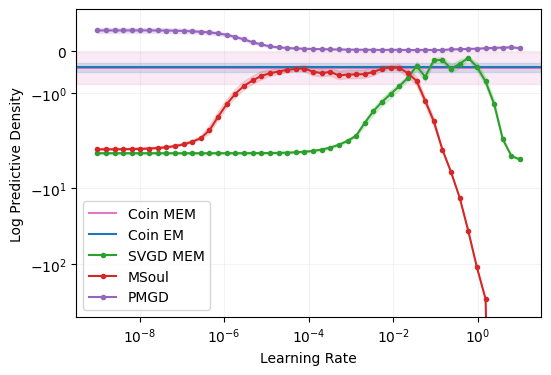

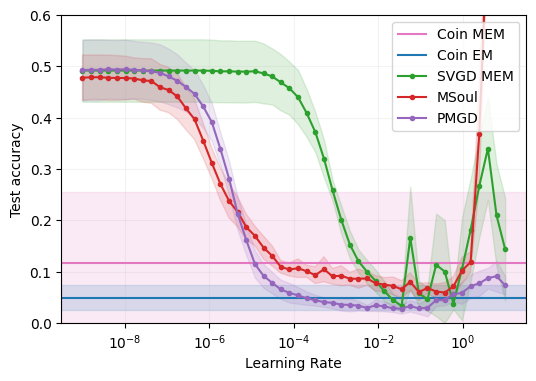

In [11]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

with open(f"results/mnist.pkl","rb") as f:
            data = pickle.load(f)

with open(f"results/coin_mnist.pkl","rb") as f:
      cdata = pickle.load(f)

with open(f"results/heuristics.pkl","rb") as f:
    hdata = pickle.load(f)

with open(f"results/coin_mnist_big_theta_alpha.pkl","rb") as f:
    chdata = pickle.load(f)

index = -1

for metric in ["lppd", "error"]:

        if metric == "lppd":
              num = -1e-1
        
        if metric == "error":
            num = 1e10

        coin = jnp.nan_to_num(jnp.array(cdata[metric]["coin_svgd"]))[:, index] # Repetitions, by iterations


        marginal_coin = jnp.nan_to_num(jnp.array(cdata[metric]["marginal_coin_svgd"]))[:, index] # Repetitions, by iterations
        ada = jnp.nan_to_num(jnp.array(data[metric]["marginal_ada_svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        pgd = jnp.nan_to_num(jnp.array(data[metric]["marginal_pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        soul = jnp.nan_to_num(jnp.array(data[metric]["marginal_soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions

        h_pgd = jnp.nan_to_num(jnp.array(hdata[metric]["pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        h_soul = jnp.nan_to_num(jnp.array(hdata[metric]["soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        h_svgd = jnp.nan_to_num(jnp.array(hdata[metric]["svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions


        step_sizes = data["step_sizes"]

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # # Plot coin
        ax.axhline(marginal_coin.mean(axis=0), label="Coin MEM", color ="C6")
        ax.axhspan(marginal_coin.mean(axis=0) - marginal_coin.std(axis=0), marginal_coin.mean(axis=0) + marginal_coin.std(axis=0), alpha=0.15, color = "C6")

        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.15, color = "C0")

        # Plot ada
        ax.plot(step_sizes, ada.mean(axis=0), ".-", label='SVGD MEM', color="C2")
        ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.15 , color="C2")

        # Plot pgd
        # ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        # ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # Plot soul
        ax.plot(step_sizes, soul.mean(axis=0), ".-", label='MSoul', color="C3")
        ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot marginal_pgd
        ax.plot(step_sizes, marginal_pgd.mean(axis=0), ".-", label='PMGD', color="C4")
        ax.fill_between(step_sizes, marginal_pgd.mean(axis=0) - jnp.minimum(marginal_pgd.std(axis=0), thresh), marginal_pgd.mean(axis=0) + jnp.minimum(marginal_pgd.std(axis=0), thresh), alpha=0.15, color="C4")

        # # Plot h_pgd
        # ax.plot(hdata["step_sizes"], h_pgd.mean(axis=0), ".-", label='Heuristic PGD', color="C5")
        # ax.fill_between(hdata["step_sizes"], h_pgd.mean(axis=0) - jnp.minimum(h_pgd.std(axis=0), thresh), h_pgd.mean(axis=0) + jnp.minimum(h_pgd.std(axis=0), thresh), alpha=0.15, color="C5")

        # # Plot h_soul
        # ax.plot(hdata["step_sizes"], h_soul.mean(axis=0), ".-", label='Heuristic Soul', color="C7")
        # ax.fill_between(hdata["step_sizes"], h_soul.mean(axis=0) - jnp.minimum(h_soul.std(axis=0), thresh), h_soul.mean(axis=0) + jnp.minimum(h_soul.std(axis=0), thresh), alpha=0.15, color="C7")

        # # Plot h_svgd
        # ax.plot(hdata["step_sizes"], h_svgd.mean(axis=0), ".-", label='Heuristic SVGD', color="C8")
        # ax.fill_between(hdata["step_sizes"], h_svgd.mean(axis=0) - jnp.minimum(h_svgd.std(axis=0), thresh), h_svgd.mean(axis=0) + jnp.minimum(h_svgd.std(axis=0), thresh), alpha=0.15, color="C8")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')
            plt.yscale('symlog')
            plt.ylim(-500, 1)

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')
            plt.ylim(0, 0.6)

        plt.xscale('log')
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.15)
        

        plt.savefig(f"results/marginal_mnist_bnn_{metric}.pdf", bbox_inches='tight')

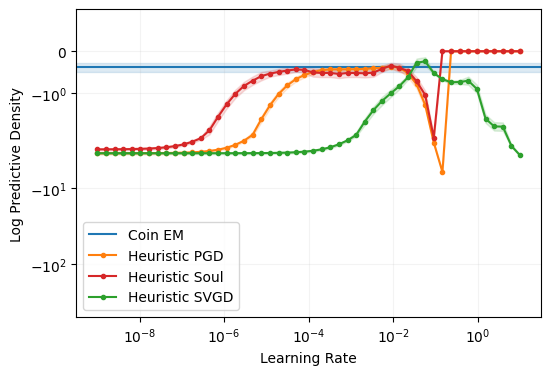

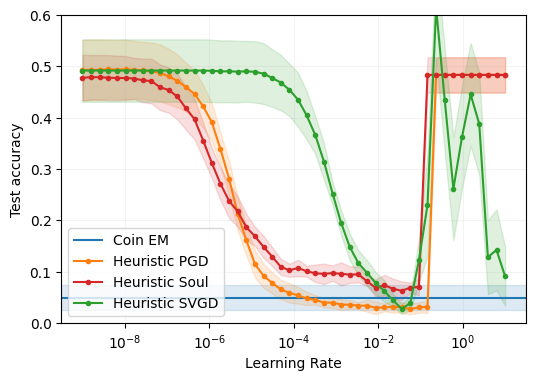

In [16]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

with open(f"results/mnist.pkl","rb") as f:
            data = pickle.load(f)

with open(f"results/coin_mnist.pkl","rb") as f:
      cdata = pickle.load(f)

with open(f"results/heuristics.pkl","rb") as f:
    hdata = pickle.load(f)

with open(f"results/coin_mnist_big_theta_alpha.pkl","rb") as f:
    chdata = pickle.load(f)

index = -1

for metric in ["lppd", "error"]:

        if metric == "lppd":
              num = -1e-1
        
        if metric == "error":
            num = 1e10

        coin = jnp.nan_to_num(jnp.array(cdata[metric]["coin_svgd"]))[:, index] # Repetitions, by iterations


        marginal_coin = jnp.nan_to_num(jnp.array(cdata[metric]["marginal_coin_svgd"]))[:, index] # Repetitions, by iterations
        ada = jnp.nan_to_num(jnp.array(data[metric]["ada_svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        pgd = jnp.nan_to_num(jnp.array(data[metric]["pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        soul = jnp.nan_to_num(jnp.array(data[metric]["soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        marginal_pgd = jnp.nan_to_num(jnp.array(data[metric]["marginal_pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions

        h_pgd = jnp.nan_to_num(jnp.array(hdata[metric]["pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        h_soul = jnp.nan_to_num(jnp.array(hdata[metric]["soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        h_svgd = jnp.nan_to_num(jnp.array(hdata[metric]["svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions


        step_sizes = data["step_sizes"]

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # # Plot coin
        # ax.axhline(marginal_coin.mean(axis=0), label="Coin MEM", color ="C6")
        # ax.axhspan(marginal_coin.mean(axis=0) - marginal_coin.std(axis=0), marginal_coin.mean(axis=0) + marginal_coin.std(axis=0), alpha=0.15, color = "C6")

        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.15, color = "C0")

        # Plot ada
        # ax.plot(step_sizes, ada.mean(axis=0), ".-", label='SVGD EM', color="C2")
        # ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.15 , color="C2")

        # # Plot pgd
        # ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        # ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # # Plot soul
        # ax.plot(step_sizes, soul.mean(axis=0), ".-", label='Soul', color="C3")
        # ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot marginal_pgd
        # ax.plot(step_sizes, marginal_pgd.mean(axis=0), ".-", label='PMGD', color="C4")
        # ax.fill_between(step_sizes, marginal_pgd.mean(axis=0) - jnp.minimum(marginal_pgd.std(axis=0), thresh), marginal_pgd.mean(axis=0) + jnp.minimum(marginal_pgd.std(axis=0), thresh), alpha=0.15, color="C4")

        # Plot h_pgd
        ax.plot(hdata["step_sizes"], h_pgd.mean(axis=0), ".-", label='Heuristic PGD', color="C1")
        ax.fill_between(hdata["step_sizes"], h_pgd.mean(axis=0) - jnp.minimum(h_pgd.std(axis=0), thresh), h_pgd.mean(axis=0) + jnp.minimum(h_pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # Plot h_soul
        ax.plot(hdata["step_sizes"], h_soul.mean(axis=0), ".-", label='Heuristic Soul', color="C3")
        ax.fill_between(hdata["step_sizes"], h_soul.mean(axis=0) - jnp.minimum(h_soul.std(axis=0), thresh), h_soul.mean(axis=0) + jnp.minimum(h_soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot h_svgd
        ax.plot(hdata["step_sizes"], h_svgd.mean(axis=0), ".-", label='Heuristic SVGD', color="C2")
        ax.fill_between(hdata["step_sizes"], h_svgd.mean(axis=0) - jnp.minimum(h_svgd.std(axis=0), thresh), h_svgd.mean(axis=0) + jnp.minimum(h_svgd.std(axis=0), thresh), alpha=0.15, color="C2")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')
            plt.yscale('symlog')
            plt.ylim(-500, 1)

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')
            plt.ylim(0, 0.6)

        plt.xscale('log')
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.15)

        plt.savefig(f"results/heuristics_mnist_bnn_{metric}.pdf", bbox_inches='tight')

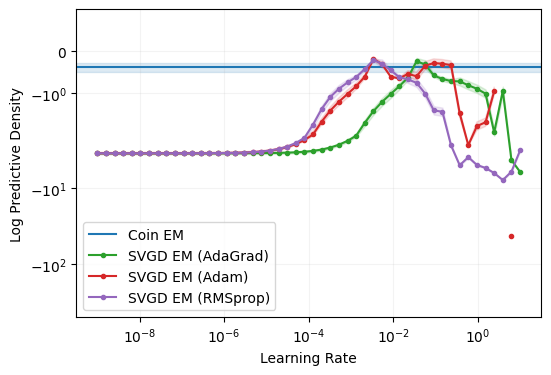

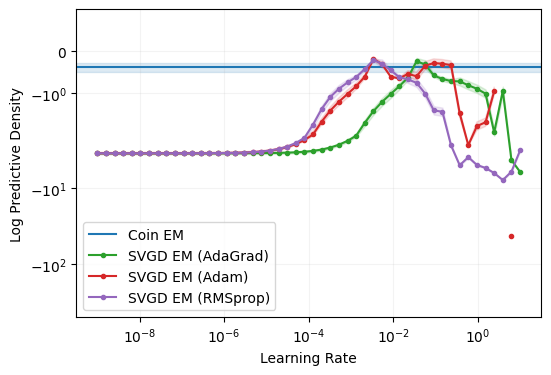

In [36]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

with open(f"results/mnist.pkl","rb") as f:
            data = pickle.load(f)

with open(f"results/coin_mnist.pkl","rb") as f:
      cdata = pickle.load(f)

with open(f"results/heuristics.pkl","rb") as f:
    hdata = pickle.load(f)

with open(f"results/coin_mnist_big_theta_alpha.pkl","rb") as f:
    chdata = pickle.load(f)

index = -1

for metric in ["lppd", "error"]:
        
        metric = "lppd"

        if metric == "lppd":
              num = -1e-1
        
        if metric == "error":
            num = 1e10

        coin = jnp.nan_to_num(jnp.array(cdata[metric]["coin_svgd"]))[:, index] # Repetitions, by iterations
        ada = jnp.nan_to_num(jnp.array(data[metric]["ada_svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        adam = jnp.array(data[metric]["adam_svgd"]).reshape((-1, 50, 500))[:, :, index] # Learnrates, by repetitions
        rms = jnp.nan_to_num(jnp.array(data[metric]["rms_svgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # # Plot coin
        # ax.axhline(marginal_coin.mean(axis=0), label="Coin MEM", color ="C6")
        # ax.axhspan(marginal_coin.mean(axis=0) - marginal_coin.std(axis=0), marginal_coin.mean(axis=0) + marginal_coin.std(axis=0), alpha=0.15, color = "C6")

        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.15, color = "C0")

        #Plot ada
        ax.plot(step_sizes, ada.mean(axis=0), ".-", label='SVGD EM (AdaGrad)', color="C2")
        ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.15 , color="C2")

        # # Plot pgd
        # ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        # ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # # Plot soul
        # ax.plot(step_sizes, soul.mean(axis=0), ".-", label='Soul', color="C3")
        # ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot marginal_pgd
        # ax.plot(step_sizes, marginal_pgd.mean(axis=0), ".-", label='PMGD', color="C4")
        # ax.fill_between(step_sizes, marginal_pgd.mean(axis=0) - jnp.minimum(marginal_pgd.std(axis=0), thresh), marginal_pgd.mean(axis=0) + jnp.minimum(marginal_pgd.std(axis=0), thresh), alpha=0.15, color="C4")

        # Plot ada
        ax.plot(step_sizes, adam.mean(axis=0), ".-", label='SVGD EM (Adam)', color="C3")
        ax.fill_between(step_sizes, adam.mean(axis=0) - jnp.minimum(adam.std(axis=0), thresh), adam.mean(axis=0) + jnp.minimum(adam.std(axis=0), thresh), alpha=0.15 , color="C3")

        # Plot ada
        ax.plot(step_sizes, rms.mean(axis=0), ".-", label='SVGD EM (RMSprop)', color="C4")
        ax.fill_between(step_sizes, rms.mean(axis=0) - jnp.minimum(rms.std(axis=0), thresh), rms.mean(axis=0) + jnp.minimum(rms.std(axis=0), thresh), alpha=0.15 , color="C4")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')
            plt.yscale('symlog')
            plt.ylim(-500, 1)

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')
            plt.ylim(0, 0.6)

        plt.xscale('log')
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.15)

        plt.savefig(f"results/svgd_optimisers_mnist_bnn_{metric}.pdf", bbox_inches='tight')

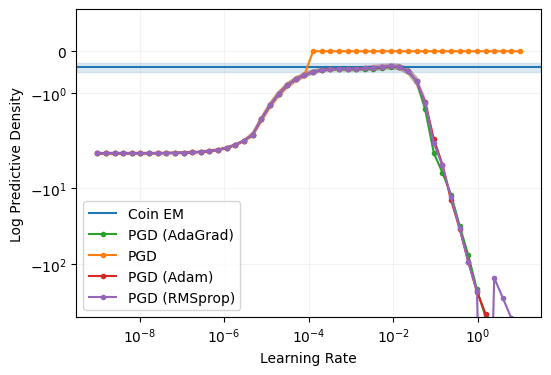

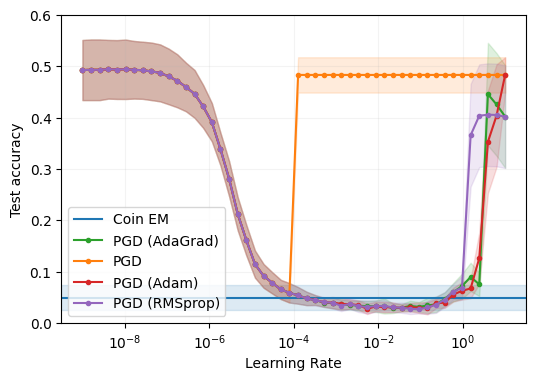

In [40]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

with open(f"results/mnist.pkl","rb") as f:
            data = pickle.load(f)

with open(f"results/coin_mnist.pkl","rb") as f:
      cdata = pickle.load(f)

with open(f"results/heuristics.pkl","rb") as f:
    hdata = pickle.load(f)

with open(f"results/coin_mnist_big_theta_alpha.pkl","rb") as f:
    chdata = pickle.load(f)

index = -1

for metric in ["lppd", "error"]:

        if metric == "lppd":
              num = -1e-1
        
        if metric == "error":
            num = 1e10

        coin = jnp.nan_to_num(jnp.array(cdata[metric]["coin_svgd"]))[:, index] # Repetitions, by iterations
        pgd = jnp.nan_to_num(jnp.array(data[metric]["pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        ada = jnp.nan_to_num(jnp.array(data[metric]["ada_pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        adam = jnp.array(data[metric]["adam_pgd"]).reshape((-1, 50, 500))[:, :, index] # Learnrates, by repetitions
        rms = jnp.nan_to_num(jnp.array(data[metric]["rms_pgd"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # # Plot coin
        # ax.axhline(marginal_coin.mean(axis=0), label="Coin MEM", color ="C6")
        # ax.axhspan(marginal_coin.mean(axis=0) - marginal_coin.std(axis=0), marginal_coin.mean(axis=0) + marginal_coin.std(axis=0), alpha=0.15, color = "C6")

        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.15, color = "C0")

        #Plot ada
        ax.plot(step_sizes, ada.mean(axis=0), ".-", label='PGD (AdaGrad)', color="C2")
        ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.15 , color="C2")

        # # Plot pgd
        ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # # Plot soul
        # ax.plot(step_sizes, soul.mean(axis=0), ".-", label='Soul', color="C3")
        # ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot marginal_pgd
        # ax.plot(step_sizes, marginal_pgd.mean(axis=0), ".-", label='PMGD', color="C4")
        # ax.fill_between(step_sizes, marginal_pgd.mean(axis=0) - jnp.minimum(marginal_pgd.std(axis=0), thresh), marginal_pgd.mean(axis=0) + jnp.minimum(marginal_pgd.std(axis=0), thresh), alpha=0.15, color="C4")

        # Plot ada
        ax.plot(step_sizes, adam.mean(axis=0), ".-", label='PGD (Adam)', color="C3")
        ax.fill_between(step_sizes, adam.mean(axis=0) - jnp.minimum(adam.std(axis=0), thresh), adam.mean(axis=0) + jnp.minimum(adam.std(axis=0), thresh), alpha=0.15 , color="C3")

        # Plot ada
        ax.plot(step_sizes, rms.mean(axis=0), ".-", label='PGD (RMSprop)', color="C4")
        ax.fill_between(step_sizes, rms.mean(axis=0) - jnp.minimum(rms.std(axis=0), thresh), rms.mean(axis=0) + jnp.minimum(rms.std(axis=0), thresh), alpha=0.15 , color="C4")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')
            plt.yscale('symlog')
            plt.ylim(-500, 1)

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')
            plt.ylim(0, 0.6)

        plt.xscale('log')
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.15)

        plt.savefig(f"results/pgd_optimisers_mnist_bnn_{metric}.pdf", bbox_inches='tight')

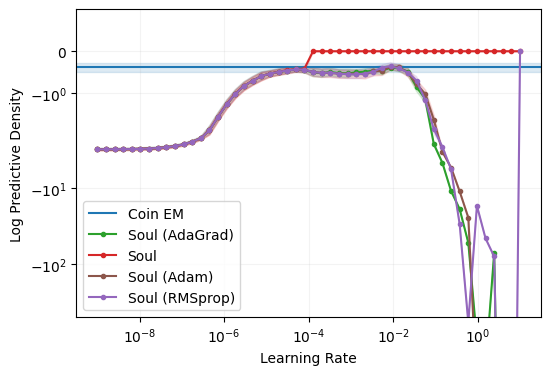

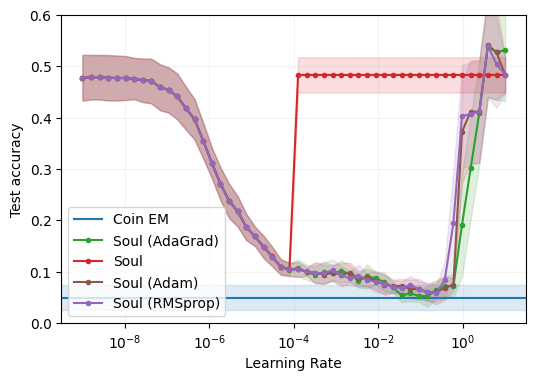

In [42]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

with open(f"results/mnist.pkl","rb") as f:
            data = pickle.load(f)

with open(f"results/coin_mnist.pkl","rb") as f:
      cdata = pickle.load(f)

with open(f"results/heuristics.pkl","rb") as f:
    hdata = pickle.load(f)

with open(f"results/coin_mnist_big_theta_alpha.pkl","rb") as f:
    chdata = pickle.load(f)

index = -1

for metric in ["lppd", "error"]:

        if metric == "lppd":
              num = -1e-1
        
        if metric == "error":
            num = 1e10

        coin = jnp.nan_to_num(jnp.array(cdata[metric]["coin_svgd"]))[:, index] # Repetitions, by iterations
        soul = jnp.nan_to_num(jnp.array(data[metric]["soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        ada = jnp.nan_to_num(jnp.array(data[metric]["ada_soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions
        adam = jnp.array(data[metric]["adam_soul"]).reshape((-1, 50, 500))[:, :, index] # Learnrates, by repetitions
        rms = jnp.nan_to_num(jnp.array(data[metric]["rms_soul"]).reshape((-1, 50, 500)))[:, :, index] # Learnrates, by repetitions

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # # Plot coin
        # ax.axhline(marginal_coin.mean(axis=0), label="Coin MEM", color ="C6")
        # ax.axhspan(marginal_coin.mean(axis=0) - marginal_coin.std(axis=0), marginal_coin.mean(axis=0) + marginal_coin.std(axis=0), alpha=0.15, color = "C6")

        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.15, color = "C0")

        #Plot ada
        ax.plot(step_sizes, ada.mean(axis=0), ".-", label='Soul (AdaGrad)', color="C2")
        ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.15 , color="C2")

        # # Plot pgd
        # ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        # ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.15, color="C1")

        # # Plot soul
        ax.plot(step_sizes, soul.mean(axis=0), ".-", label='Soul', color="C3")
        ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.15, color="C3")

        # Plot marginal_pgd
        # ax.plot(step_sizes, marginal_pgd.mean(axis=0), ".-", label='PMGD', color="C4")
        # ax.fill_between(step_sizes, marginal_pgd.mean(axis=0) - jnp.minimum(marginal_pgd.std(axis=0), thresh), marginal_pgd.mean(axis=0) + jnp.minimum(marginal_pgd.std(axis=0), thresh), alpha=0.15, color="C4")

        # Plot ada
        ax.plot(step_sizes, adam.mean(axis=0), ".-", label='Soul (Adam)', color="C5")
        ax.fill_between(step_sizes, adam.mean(axis=0) - jnp.minimum(adam.std(axis=0), thresh), adam.mean(axis=0) + jnp.minimum(adam.std(axis=0), thresh), alpha=0.15 , color="C3")

        # Plot ada
        ax.plot(step_sizes, rms.mean(axis=0), ".-", label='Soul (RMSprop)', color="C4")
        ax.fill_between(step_sizes, rms.mean(axis=0) - jnp.minimum(rms.std(axis=0), thresh), rms.mean(axis=0) + jnp.minimum(rms.std(axis=0), thresh), alpha=0.15 , color="C4")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')
            plt.yscale('symlog')
            plt.ylim(-500, 1)

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')
            plt.ylim(0, 0.6)

        plt.xscale('log')
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.15)

        plt.savefig(f"results/soul_optimisers_mnist_bnn_{metric}.pdf", bbox_inches='tight')